In [1]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data from CSV file
data = pd.read_csv("telecom_customer_churn.csv")

In [3]:
def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df

In [4]:
# Replaced NULL values with valid values
data['Churn Category'] = data['Churn Category'].replace(np.nan,'satisfied')
data['Churn Reason'] = data['Churn Reason'].replace(np.nan,'No Reason')
data['Internet Type'] = data['Internet Type'].replace(np.nan,'No data')
data['Multiple Lines'] = data['Multiple Lines'].replace(np.nan, 'No phone Service')
data['Avg Monthly Long Distance Charges'] = data['Avg Monthly Long Distance Charges'].replace(np.nan,0)
data['Avg Monthly GB Download'] = data['Avg Monthly GB Download'].replace(np.nan,0)
data['Online Security'] = data['Online Security'].replace(np.nan,'No')
data['Online Backup'] = data['Online Backup'].replace(np.nan,'No')
data['Device Protection Plan'] = data['Device Protection Plan'].replace(np.nan,'No')
data['Premium Tech Support'] = data['Premium Tech Support'].replace(np.nan,'No')
data['Streaming TV'] = data['Streaming TV'].replace(np.nan,'No')
data['Streaming Movies'] = data['Streaming Movies'].replace(np.nan,'No')
data['Streaming Music'] = data['Streaming Music'].replace(np.nan,'No')
data['Unlimited Data'] = data['Unlimited Data'].replace(np.nan,'No')

In [5]:
# Check for null values
data.isna().any(axis=0).any()

False

In [6]:
# Checking number of unique values in each column
data.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [7]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in data.columns:
    if data[col].nunique()<100:
        print(col, sorted(data[col].unique()), '\n')

Gender ['Female', 'Male'] 

Age [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80] 

Married ['No', 'Yes'] 

Number of Dependents [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

Number of Referrals [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

Tenure in Months [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72] 

Offer ['None', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E'] 

Phone Service ['No', 'Yes'] 

Multiple Lines ['No', 'No phone Service', 'Yes'] 

Internet Service ['No', 'Yes'] 

Internet Type ['Cable', 'DSL', 'Fiber Optic', 'No data'] 

Avg Monthly GB Download [0.0, 2.0,

In [8]:
# Following data columns are not important for data analysis (more details included in the report) 
to_drop = ['City', 'Customer_ID','Latitude','Longitude', 'Offer', 'Streaming_Music', 'Unlimited_Data']

In [9]:
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [10]:
# Check data by printing first few rows
data.head()

,Gender,Age,Married,Number_of_Dependents,Zip_Code,Number_of_Referrals,Tenure_in_Months,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,Female,37,Yes,0,93225,2,9,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,satisfied,No Reason
1,Male,46,No,0,91206,0,9,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,satisfied,No Reason
2,Male,50,No,0,92627,0,4,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,94553,1,13,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,93010,3,3,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [11]:
# Check data by printing last few rows
data.tail()

,Gender,Age,Married,Number_of_Dependents,Zip_Code,Number_of_Referrals,Tenure_in_Months,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
7038,Female,20,No,0,91941,0,13,Yes,46.68,No,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,satisfied,No Reason
7039,Male,40,Yes,0,95367,1,22,Yes,16.20,Yes,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,95432,0,2,Yes,18.62,No,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,satisfied,No Reason
7041,Male,21,Yes,0,92075,5,67,Yes,2.12,No,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,satisfied,No Reason
7042,Male,36,Yes,0,96125,1,63,No,0.00,No phone Service,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,satisfied,No Reason


In [12]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = ['Customer_Status','Married','Gender','Contract','Internet_Service', 'Churn_Category', 'Churn_Reason',
                          'Internet_Type','Phone_Service', 'Multiple_Lines','Online_Security','Online_Backup',
                          'Device_Protection_Plan','Premium_Tech_Support', 'Streaming_TV','Streaming_Movies', 
                          'Paperless_Billing','Payment_Method'
                         ]


dummy_data_file_index = 0

In [13]:
def get_dummy_data_with_output_no_drop_first(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= False)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Monthly_Charge']
    dummy_data.drop(columns=['Monthly_Charge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Monthly_Charge']
    dummy_data.drop(columns=['Monthly_Charge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variable_columns, data)
y_, dummy_data_ = get_dummy_data_with_output_no_drop_first(dummy_variable_columns, data)

In [14]:
# Starting with imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [15]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)
# Splitting data for random forest (dummy variable , without drop first)
X_train_, X_test_, y_train_, y_test_ = train_test_split(dummy_data_,y_,test_size=.3, random_state=0)

In [16]:
# Creating a function to create Random Forest Model
figsize=(8,5)

def get_rf_model(y_train,X_train, X_test):
    rf = RandomForestRegressor()
    model=rf.fit(X_train, y_train_)
    for i, item in enumerate(rf.feature_importances_):
        print("{0:s}: {1:.2f}".format(X_train.columns[i], item))
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_hat,y=y_test-y_hat,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr

# Creating a function to create Multiple Linear Regression Model

def get_lr_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr, intercept

Age: 0.01
Number_of_Dependents: 0.00
Zip_Code: 0.01
Number_of_Referrals: 0.00
Tenure_in_Months: 0.00
Avg_Monthly_Long_Distance_Charges: 0.01
Avg_Monthly_GB_Download: 0.08
Total_Charges: 0.03
Total_Refunds: 0.01
Total_Extra_Data_Charges: 0.00
Total_Long_Distance_Charges: 0.05
Total_Revenue: 0.01
Customer_Status_Churned: 0.00
Customer_Status_Joined: 0.00
Customer_Status_Stayed: 0.00
Married_No: 0.00
Married_Yes: 0.00
Gender_Female: 0.00
Gender_Male: 0.00
Contract_Month-to-Month: 0.00
Contract_One_Year: 0.00
Contract_Two_Year: 0.00
Internet_Service_No: 0.04
Internet_Service_Yes: 0.05
Churn_Category_Attitude: 0.00
Churn_Category_Competitor: 0.00
Churn_Category_Dissatisfaction: 0.00
Churn_Category_Other: 0.00
Churn_Category_Price: 0.00
Churn_Category_satisfied: 0.00
Churn_Reason_Attitude_of_service_provider: 0.00
Churn_Reason_Attitude_of_support_person: 0.00
Churn_Reason_Competitor_had_better_devices: 0.00
Churn_Reason_Competitor_made_better_offer: 0.00
Churn_Reason_Competitor_offered_highe

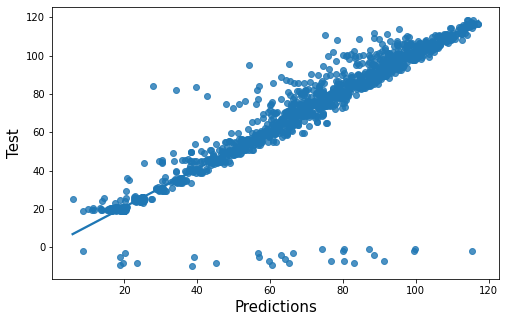

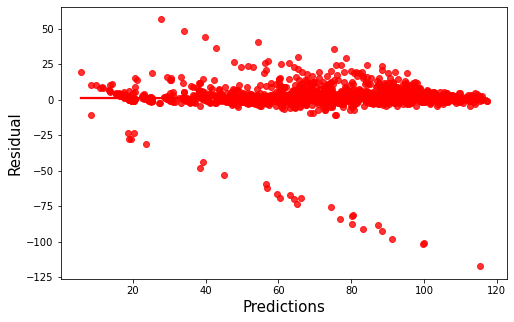


Printing model coefficients and intercept summary for sklearn model:
 [['Age' '-0.006837572610279177']
 ['Number_of_Dependents' '-0.08214768234846423']
 ['Zip_Code' '8.945543820119972e-05']
 ['Number_of_Referrals' '-0.020183681786121142']
 ['Tenure_in_Months' '-0.01831883247345334']
 ['Avg_Monthly_Long_Distance_Charges' '0.006178901681045179']
 ['Avg_Monthly_GB_Download' '-0.000894714261007401']
 ['Total_Charges' '-0.008675331751703652']
 ['Total_Refunds' '-0.0380704211302465']
 ['Total_Extra_Data_Charges' '-0.01095936584013435']
 ['Total_Long_Distance_Charges' '-0.009258050119557826']
 ['Total_Revenue' '0.009177672938358583']
 ['Customer_Status_Joined' '0.13279869924112409']
 ['Customer_Status_Stayed' '-0.26677334796181995']
 ['Married_Yes' '0.6252606118639514']
 ['Gender_Male' '-0.37245315684557356']
 ['Contract_One_Year' '0.13721189552066249']
 ['Contract_Two_Year' '-0.011808053167418842']
 ['Internet_Service_Yes' '13.27780382796578']
 ['Churn_Category_Competitor' '1.16919509679303

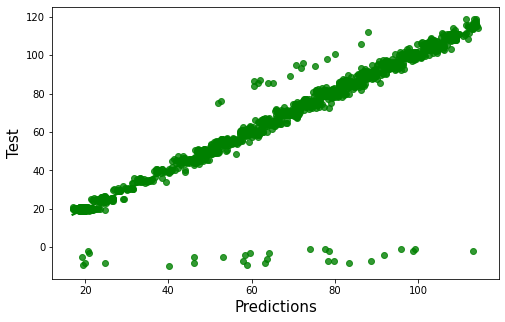

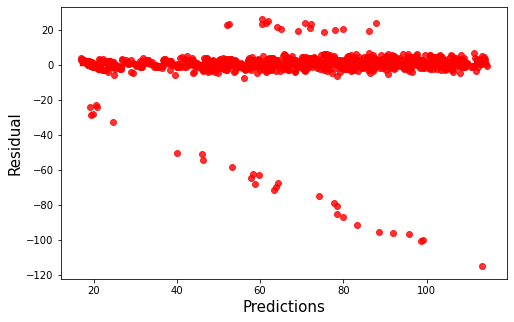

In [17]:
# Run random forect model function
model_rf, arr_sm = get_rf_model(y_train_,X_train_, X_test_);
# Run linear regression model
model_lr, arr, intercept = get_lr_model(y_train,X_train, X_test);

In [18]:
print (len(model_rf.estimators_))
for md in model_rf.estimators_:
    print(md.score(X_test_, y_test_), '|',md.get_depth())

100
0.7550812501352052 | 33
0.6586899491431251 | 30
0.7568481053690648 | 31
0.7695837661282223 | 30
0.7659692199416565 | 33
0.7692497562912473 | 34
0.7258760259234749 | 29
0.7683401268056511 | 35
0.8028597033091067 | 30
0.7625052578642589 | 31
0.7395462274260839 | 35
0.7684936980495009 | 33
0.7964305499452937 | 34
0.7802711486363261 | 28
0.7364496323259304 | 30
0.7820760199769659 | 34
0.7585814203802069 | 33
0.8252964163853774 | 28
0.761830243718093 | 28
0.735041048966904 | 28
0.7666848157578573 | 33
0.7887928018893758 | 30
0.7262744121263041 | 34
0.7849196890838879 | 29
0.7393232823882376 | 35
0.7521816348864756 | 33
0.7395265135416762 | 29
0.8141051933887615 | 28
0.7307028417004977 | 35
0.7291127055952892 | 27
0.757497766209622 | 27
0.755959020865832 | 28
0.8336623170635662 | 33
0.7728392189779175 | 29
0.7521747524318104 | 33
0.7050808770530145 | 32
0.7287971316790536 | 29
0.7623067519242701 | 31
0.7663168320818402 | 28
0.7138901841489469 | 33
0.7700350246149127 | 32
0.73776557837513

c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fi

0.7398822499654995 | 27
0.8102983889507522 | 31
0.7538477068460614 | 28
0.7861595800342297 | 30
0.736141499747623 | 29
0.7926890938963997 | 30
0.7913273627812597 | 33
0.7171995752559683 | 37
0.7719113751977036 | 28
0.8375905762296406 | 28
0.759911498708132 | 33
0.7371529760719782 | 34
0.7425728272155085 | 28
0.7510304220880091 | 29
0.7900548181126866 | 31
0.7350779930777704 | 34
0.8060265924334569 | 30
0.7528426203400469 | 32
0.7975164589207673 | 27
0.7580654374301128 | 32
0.7323613313968497 | 30
0.7724932184450741 | 31
0.7233179244831176 | 37
0.7483957163014405 | 32
0.8176299087267223 | 34
0.7557255895398662 | 34
0.7620579163783685 | 33
0.806596962915569 | 31
0.7392425273702069 | 26
0.7246765745133726 | 35
0.7022741532614487 | 32
0.7473649645269616 | 31
0.7685409899321608 | 31
0.7831902043502807 | 27
0.7672819006190419 | 29
0.7376699960877823 | 31
0.8206463691210871 | 29
0.810271974489638 | 32
0.7103462885155559 | 35
0.7898421931433688 | 31
0.7959436963763027 | 29
0.7425204764757267 |

c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\jeyae\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fi